In [1]:
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("https://assets.digitalocean.com/articles/eng_python/prophet/AirPassengers.csv")

In [3]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df = df.rename(columns={'Month': 'ds',
                        'AirPassengers': 'y'})

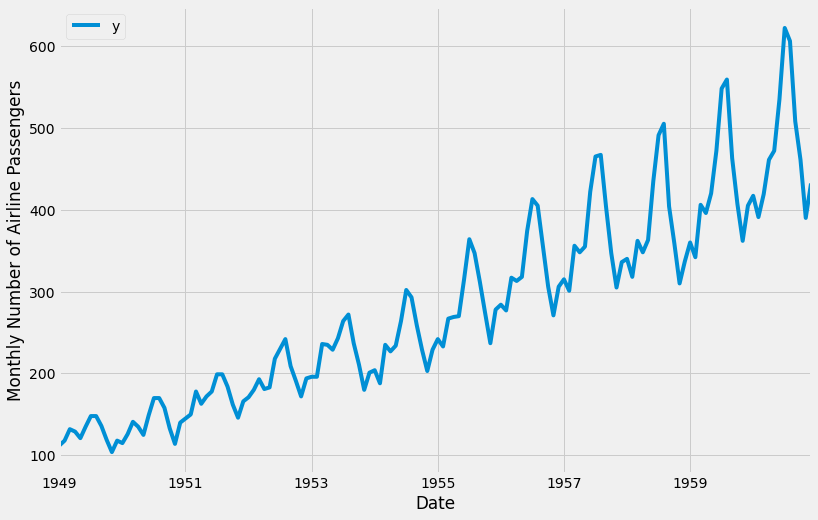

In [4]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

In [5]:
model = Prophet(interval_width=0.95, daily_seasonality=True, weekly_seasonality=True)
model.fit(df)

In [6]:
future_dates = model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [7]:
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,650.825550,609.111718,692.573762
176,1963-09-01,601.485333,555.639860,642.556033
177,1963-10-01,562.587118,518.543331,605.968349
178,1963-11-01,540.406904,501.410377,588.147514
179,1963-12-01,563.054437,522.801411,608.592156


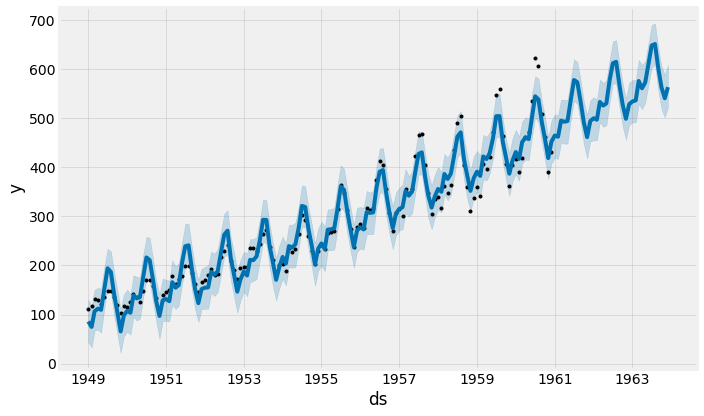

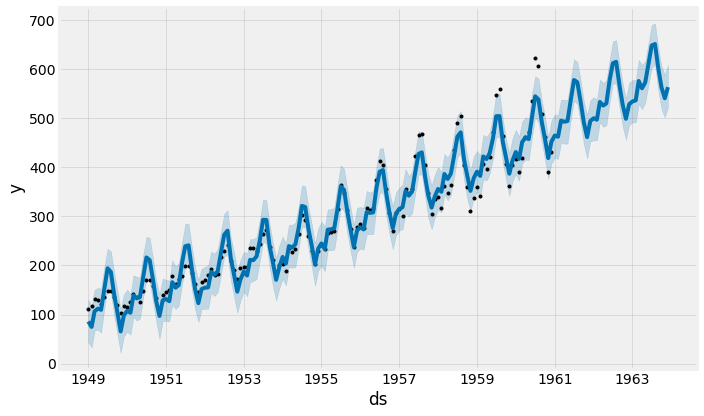

In [8]:
model.plot(forecast, uncertainty=True)

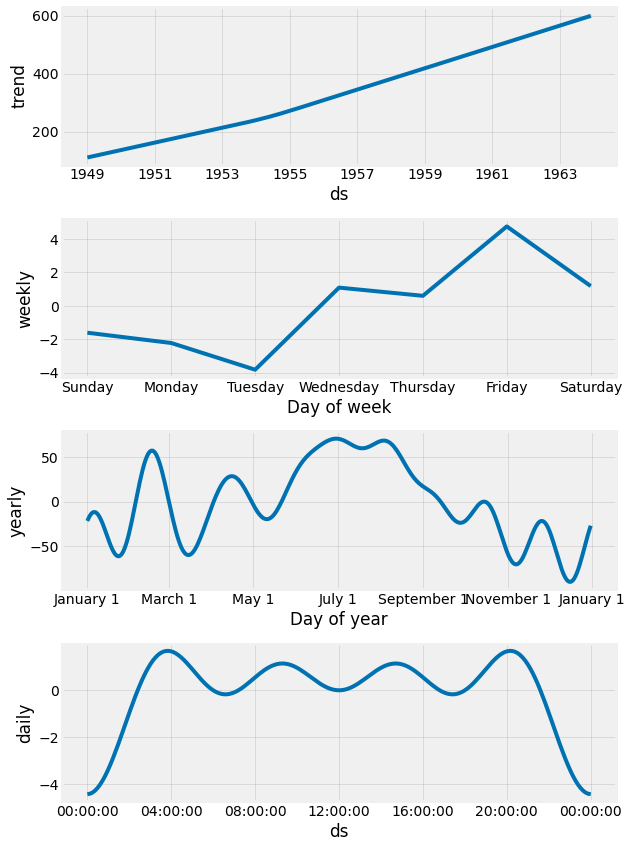

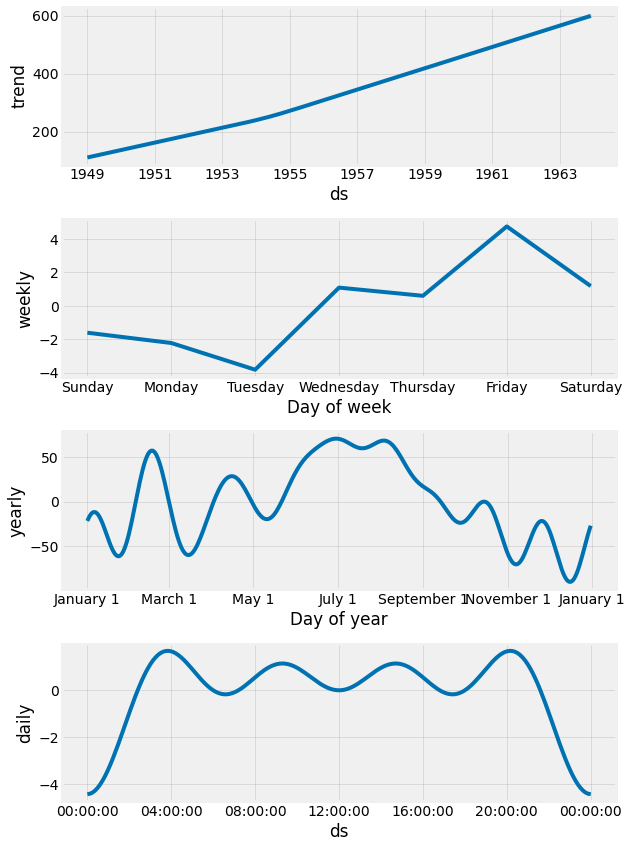

In [9]:
model.plot_components(forecast)